<a href="https://colab.research.google.com/github/Anjaney5000/Gold-Price-Prediction-Model/blob/main/Gold_Price_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARY


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score , mean_absolute_error, mean_squared_error, r2_score




DATA COLLECTION AND PROCESSING

In [ ]:
gold_data = pd.read_csv('/content/ayushKaDataset notnull.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,NaN,84.860001,78.470001,15.180,1.471692
1,1/3/2008,NaN,85.570000,78.370003,15.285,1.474491
2,1/4/2008,NaN,85.129997,77.309998,15.167,1.475492
3,1/7/2008,NaN,84.769997,75.500000,15.053,1.468299
4,1/8/2008,NaN,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.isnull().sum()

Date        0
SPX        38
GLD        28
USO        13
SLV         0
EUR/USD     0
dtype: int64

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2252 non-null   float64
 2   GLD      2262 non-null   float64
 3   USO      2277 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.shape


(2290, 6)

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data=gold_data.fillna(gold_data.mean())

#missing values gets filled with mean value


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [ ]:
Q1 = gold_data['GLD'].quantile(0.25)
Q3 = gold_data['GLD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
gold_data = gold_data[(gold_data['GLD'] >= lower_bound) & (gold_data['GLD'] <= upper_bound)]

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2140 non-null   datetime64[ns]
 1   SPX      2140 non-null   float64       
 2   GLD      2140 non-null   float64       
 3   USO      2140 non-null   float64       
 4   SLV      2140 non-null   float64       
 5   EUR/USD  2140 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.0 KB


In [ ]:
gold_data.shape

(2140, 6)

Text(0, 0.5, 'Price')

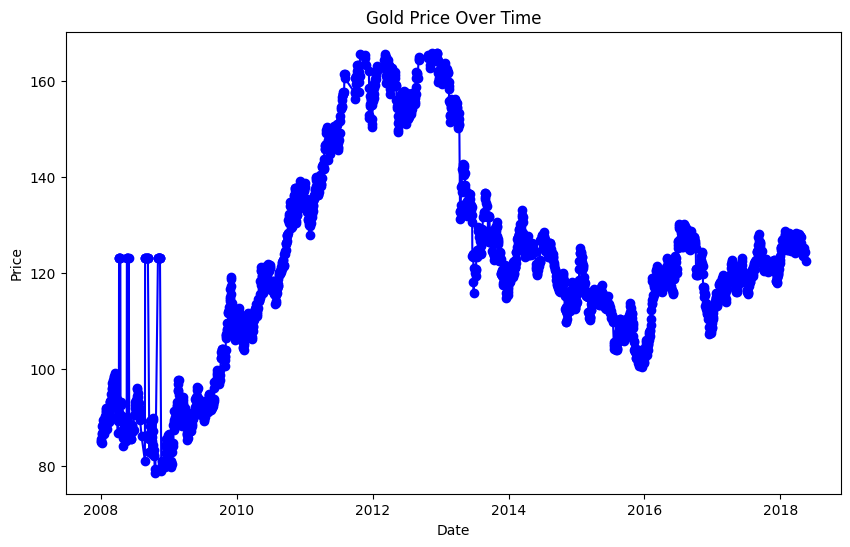

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting the 'Date' vs 'Price' column
plt.plot(gold_data['Date'], gold_data['GLD'], marker='o', color='b')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#number of rows and colums
gold_data.shape

(2140, 6)

In [ ]:
#getting some basic informations about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2140 non-null   datetime64[ns]
 1   SPX      2140 non-null   float64       
 2   GLD      2140 non-null   float64       
 3   USO      2140 non-null   float64       
 4   SLV      2140 non-null   float64       
 5   EUR/USD  2140 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.0 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numerical_cols = gold_data.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max normalization to numerical columns
scaler = MinMaxScaler()
gold_data[numerical_cols] = scaler.fit_transform(gold_data[numerical_cols])

# Display the first few rows of the normalized dataset
print("Normalized gold_data:")
print(gold_data.head())

Normalized gold_data:
        Date       SPX       GLD       USO       SLV   EUR/USD
0 2008-01-02  0.448877  0.072786  0.643809  0.157784  0.772924
1 2008-01-03  0.448877  0.080911  0.642896  0.160541  0.777924
2 2008-01-04  0.448877  0.075875  0.633218  0.157443  0.779713
3 2008-01-07  0.448877  0.071756  0.616691  0.154450  0.766862
4 2008-01-08  0.448877  0.094759  0.621804  0.168548  0.925504


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2140,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,2013-04-24 21:52:49.345794560,0.460310,0.486075,0.210404,0.267743,0.430912
min,2008-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010-07-26 18:00:00,0.265448,0.363727,0.048165,0.166973,0.183464
50%,2013-07-23 12:00:00,0.448877,0.476654,0.233428,0.207141,0.468267
75%,2015-12-17 06:00:00,0.640500,0.571870,0.270795,0.301851,0.592138
max,2018-05-16 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.237261,0.226535,0.175861,0.166082,0.240566


Correlation:

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.corr()

<Axes: >

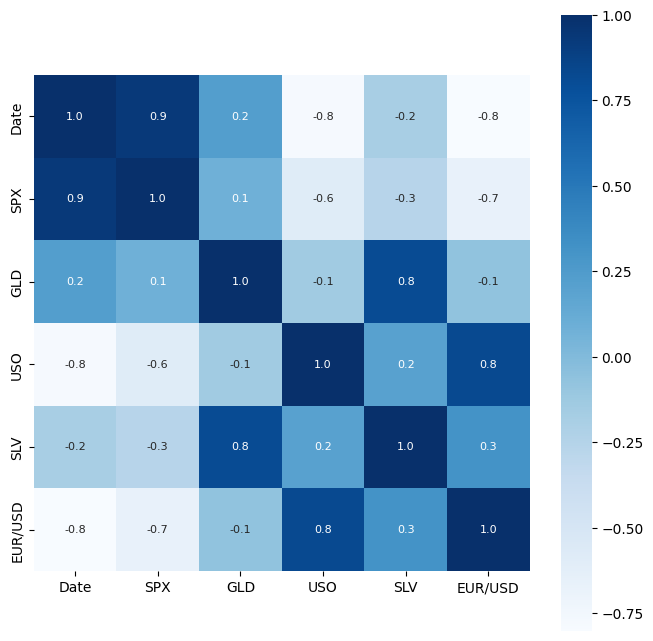

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.229253
SPX        0.079309
GLD        1.000000
USO       -0.141007
SLV        0.816049
EUR/USD   -0.062912
Name: GLD, dtype: float64


<ipython-input-24-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

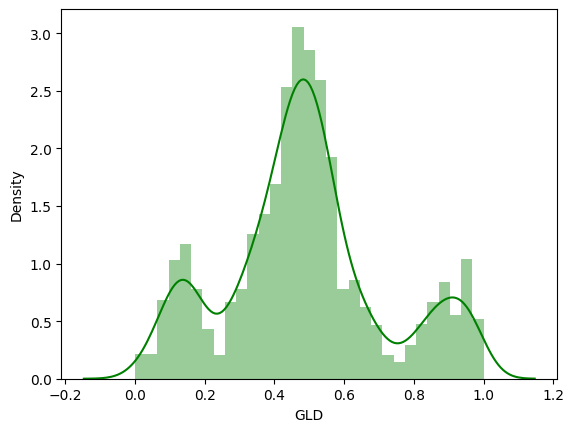

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

           SPX       USO       SLV   EUR/USD
0     0.448877  0.643809  0.157784  0.772924
1     0.448877  0.642896  0.160541  0.777924
2     0.448877  0.633218  0.157443  0.779713
3     0.448877  0.616691  0.154450  0.766862
4     0.448877  0.621804  0.168548  0.925504
...        ...       ...       ...       ...
2285  0.908507  0.055698  0.166448  0.263942
2286  0.920286  0.058528  0.166973  0.260250
2287  0.931796  0.058893  0.172486  0.272811
2288  0.935010  0.058619  0.167761  0.275249
2289  0.933029  0.058855  0.164983  0.255446

[2140 rows x 4 columns]


In [ ]:
print(Y)

0       0.072786
1       0.080911
2       0.075875
3       0.071756
4       0.094759
          ...   
2285    0.527466
2286    0.524491
2287    0.534218
2288    0.526322
2289    0.504049
Name: GLD, Length: 2140, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[0.93290107 0.38128175 0.32891964 0.38868541 0.43065342 0.49319177
 0.40489928 0.57060994 0.54470125 0.15303502 0.17317346 0.69850421
 0.40395741 0.34217324 0.41979858 0.88847559 0.41069235 0.3849954
 0.20421493 0.44445181 0.45714578 0.4409327  0.32229112 0.45420462
 0.43905927 0.38970588 0.37568206 0.55057789 0.49541468 0.29860037
 0.48409817 0.48907528 0.49975619 0.38298351 0.64248908 0.28048751
 0.4735271  0.65589374 0.20254624 0.1784573  0.41499196 0.47549095
 0.40640532 0.88865524 0.5466342  0.10760814 0.43961889 0.45002859
 0.16125084 0.49757149 0.9422007  0.05589214 0.413455   0.36037192
 0.29849049 0.10744791 0.58876171 0.88180129 0.65170859 0.57399515
 0.53927784 0.54483287 0.54356941 0.29541196 0.39549323 0.50000226
 0.62536963 0.26516706 0.87907868 0.11164042 0.44580795 0.38687339
 0.89362208 0.08285419 0.46773972 0.46853397 0.46140876 0.19278669
 0.29036391 0.42743302 0.31720186 0.48537306 0.38853167 0.38641449
 0.45654495 0.59395284 0.96987634 0.29928243 0.44971042 0.92444

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


R squared error :  0.9710864329355118
Mean Absolute Error (MAE): 0.018039546916343425
Mean Squared Error (MSE): 0.001475423783815831
Root Mean Squared Error (RMSE): 0.03841124553845958


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

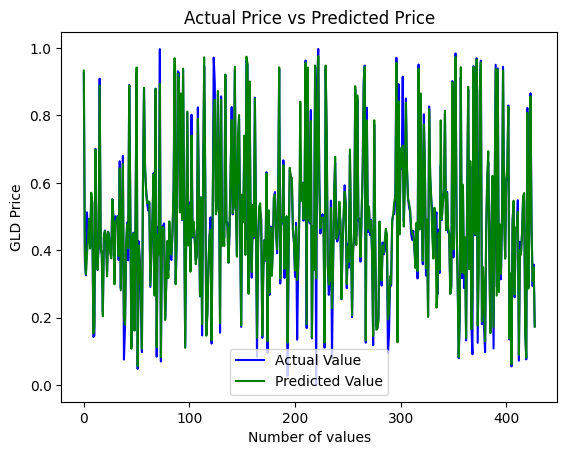

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()